Примеры из:
https://habr.com/ru/post/331382/ 

In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

Using TensorFlow backend.


11493376/11490434 [==============================] - 6s 0us/step


### Обычный Автоэнкодер

In [3]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10, # изменить на 50
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 77us/step - loss: 0.2584 - val_loss: 0.1766
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1565 - val_loss: 0.1386
Epoch 3/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.1293 - val_loss: 0.1190
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1142 - val_loss: 0.1072
Epoch 5/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1041 - val_loss: 0.0989
Epoch 6/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0969 - val_loss: 0.0930
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.0918 - val_loss: 0.0887
Epoch 8/50
60000/60000 [==============================] - 3s 56us/step - loss: 0.0880 - val_loss: 0.0856
Epoch 9/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.0853 - val_loss: 0.0834
Epoch

In [7]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [8]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([ 9.375983 ,  6.5796013,  7.0501165,  6.4367514,  6.381505 ,
        3.2192   , 10.730157 ,  5.477375 ,  7.309742 , 11.182494 ,
        4.035531 , 10.648399 ,  4.957839 ,  4.098322 ,  7.357723 ,
        2.5483952, 10.10886  ,  5.949669 ,  3.2204638,  6.836434 ,
        4.4109774,  4.2052555,  3.9008603,  8.171032 ,  8.583001 ,
       14.040967 ,  6.9586377,  7.637338 , 12.309094 ,  6.7935457,
        7.6328077,  5.5640244,  7.956088 ,  4.686182 ,  9.134479 ,
        1.0067271,  5.563733 ,  4.281664 ,  1.9461553,  6.2658477,
        5.93234  ,  9.565946 ,  5.3352356,  5.40721  ,  4.4510546,
        6.795058 ,  3.8498673,  3.581955 , 14.06466  ], dtype=float32)

In [9]:
array([  6.64665604,   7.53528595,   3.81508064,   4.66803837,
         1.50886345,   5.41063929,   9.28293324,  10.79530716,
         0.39599913,   4.20529413,   6.53982353,   5.64758158,
         5.25313473,   1.37336707,   9.37590599,   6.00672245,
         4.39552879,   5.39900637,   4.11449528,   7.490417  ,
        10.89267063,   7.74325705,  13.35806847,   3.59005809,
         9.75185394,   2.87570286,   3.64097357,   7.86691713,
         5.93383646,   5.52847338,   3.45317888,   1.88125253,
         7.471385  ,   7.29820824,  10.02830505,  10.5430584 ,
         3.2561543 ,   8.24713707,   2.2687614 ,   6.60069561,
         7.58116722,   4.48140812,   6.13670635,   2.9162209 ,
         8.05503941,  10.78182602,   4.26916027,   5.17175484,   6.18108797], dtype=float32)

NameError: name 'array' is not defined

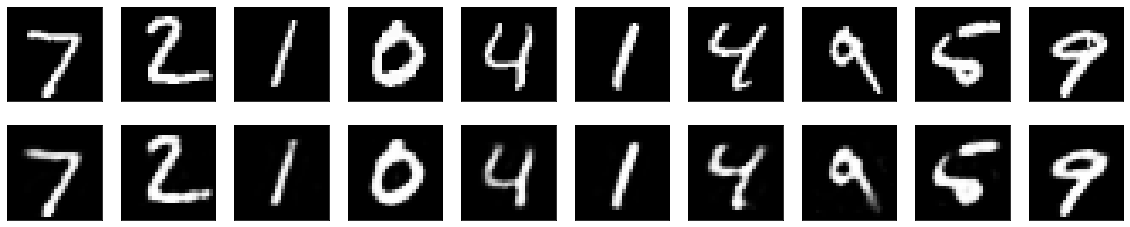

In [10]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

### Глубокий Автоэнкодер

In [12]:
def create_deep_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear')(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

d_encoder, d_decoder, d_autoencoder = create_deep_dense_ae()
d_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

d_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                134750    
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         135485    
Total params: 270,235
Trainable params: 270,235
Non-trainable params: 0
_________________________________________________________________


In [13]:
d_autoencoder.fit(x_train, x_train,
                  epochs=10, #изменить на 100
                  batch_size=256,
                  shuffle=True,
                  validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/step - loss: 0.2233 - val_loss: 0.1439
Epoch 2/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.1304 - val_loss: 0.1183
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1142 - val_loss: 0.1079
Epoch 4/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1061 - val_loss: 0.1018
Epoch 5/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.1010 - val_loss: 0.0978
Epoch 6/10
60000/60000 [==============================] - 7s 110us/step - loss: 0.0978 - val_loss: 0.0953
Epoch 7/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0953 - val_loss: 0.0925
Epoch 8/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.0931 - val_loss: 0.0907
Epoch 9/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.0912 - val_loss: 0.0892

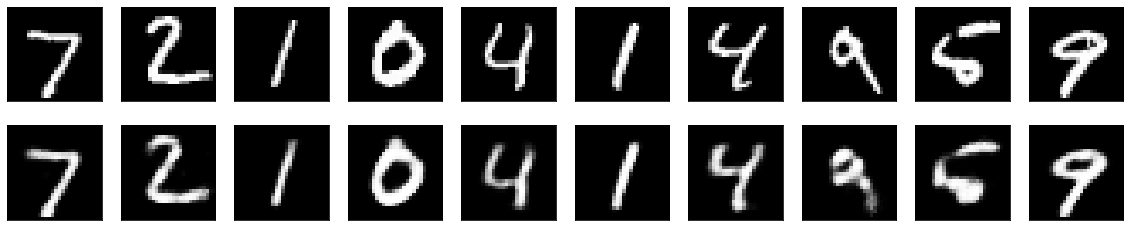

In [14]:
n = 10

imgs = x_test[:n]
encoded_imgs = d_encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

decoded_imgs = d_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

### Сверточный Автоэнкодер

In [15]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

def create_deep_conv_ae():
    input_img = Input(shape=(28, 28, 1))

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x)

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1))
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)

    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae()
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

c_autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
c_autoencoder.fit(x_train, x_train,
                epochs=10, # было 64
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1408s 23ms/step - loss: 0.1809 - val_loss: 0.1042
Epoch 2/10
60000/60000 [==============================] - 1307s 22ms/step - loss: 0.0965 - val_loss: 0.0887
Epoch 3/10
60000/60000 [==============================] - 1267s 21ms/step - loss: 0.0877 - val_loss: 0.0837
Epoch 4/10
15104/60000 [======>.......................] - ETA: 15:31 - loss: 0.0845

KeyboardInterrupt: 

In [ ]:
n = 10

imgs = x_test[:n]
encoded_imgs = c_encoder.predict(imgs, batch_size=n)
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)

### Denoising Автоэнкодер

Автоэнкодеры можно обучить убирать шум из данных: для этого надо на вход подавать зашумленные данные и на выходе сравнивать с данными без шума:

L(x, f(g(\hat x))),

где \hat x — зашумленные данные.

In [17]:
import keras.backend as K
from keras.layers import Lambda

batch_size = 16

def create_denoising_model(autoencoder):
    def add_noise(x):
        noise_factor = 0.5
        x = x + K.random_normal(x.get_shape(), 0.5, noise_factor)
        x = K.clip(x, 0., 1.)
        return x

    input_img  = Input(batch_shape=(batch_size, 28, 28, 1))
    noised_img = Lambda(add_noise)(input_img)

    noiser = Model(input_img, noised_img, name="noiser")
    denoiser_model = Model(input_img, autoencoder(noiser(input_img)), name="denoiser")
    return noiser, denoiser_model


noiser, denoiser_model = create_denoising_model(autoencoder)
denoiser_model.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
denoiser_model.fit(x_train, x_train,
                   epochs=10, #200
                   batch_size=batch_size,
                   shuffle=True,
                   validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 184us/step - loss: 0.1663 - val_loss: 0.1375
Epoch 2/10
60000/60000 [==============================] - 11s 182us/step - loss: 0.1357 - val_loss: 0.1311
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 0.1325 - val_loss: 0.1304
Epoch 4/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1310 - val_loss: 0.1289
Epoch 5/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.1304 - val_loss: 0.1283
Epoch 6/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.1298 - val_loss: 0.1273
Epoch 7/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.1293 - val_loss: 0.1270
Epoch 8/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.1291 - val_loss: 0.1264
Epoch 9/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1289 - val_

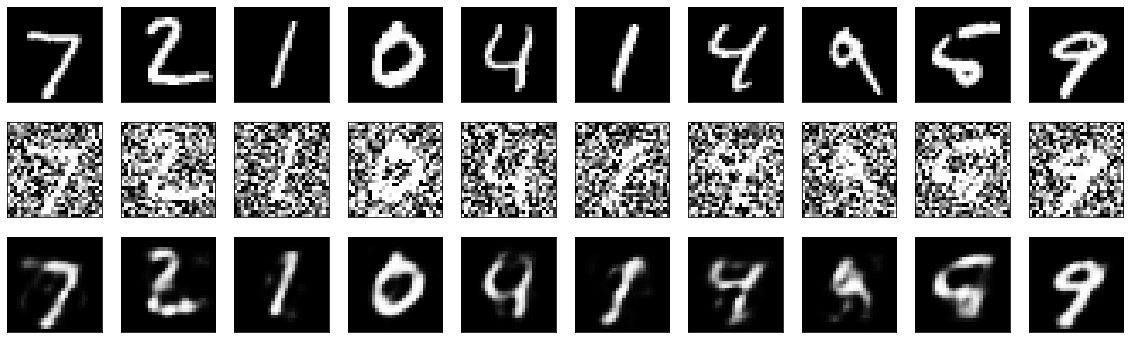

In [19]:
n = 10

imgs = x_test[:batch_size]
noised_imgs = noiser.predict(imgs, batch_size=batch_size)
encoded_imgs = encoder.predict(noised_imgs[:n],  batch_size=n)
decoded_imgs = decoder.predict(encoded_imgs[:n], batch_size=n)

plot_digits(imgs[:n], noised_imgs, decoded_imgs)

### Разреженный (Sparse) автоэнкодер

Разреженный автоэнкодер — это просто автоэнкодер, у которого в функцию потерь добавлен штраф за величины значений в коде, то есть автоэнкодер стремится минимизировать такую функцию ошибки:

L(x, f(g(x))) + \Omega(h),

где h = g(x) — код,

\Omega(h) — обычный регуляризатор (например L1):

\Omega(h) = \lambda * |h|

Разреженный автоэнкодер не обязательно сужается к центру. Его код может иметь и большую размерность, чем входной сигнал. Обучаясь приближать тождественную функцию x = f(g(x)), он учится в коде выделять полезные свойства сигнала. Из-за регуляризатора даже расширяющийся к центру разреженный автоэнкодер не может выучить тождественную функцию напрямую.

In [20]:
from keras.regularizers import L1L2

def create_sparse_ae():
    encoding_dim = 16
    lambda_l1 = 0.00001
    
    # Энкодер
    input_img = Input(shape=(28, 28, 1))
    flat_img = Flatten()(input_img)
    x = Dense(encoding_dim*3, activation='relu')(flat_img)
    x = Dense(encoding_dim*2, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='linear', activity_regularizer=L1L2(lambda_l1))(x)
    
    # Декодер
    input_encoded = Input(shape=(encoding_dim,))
    x = Dense(encoding_dim*2, activation='relu')(input_encoded)
    x = Dense(encoding_dim*3, activation='relu')(x)
    flat_decoded = Dense(28*28, activation='sigmoid')(x)
    decoded = Reshape((28, 28, 1))(flat_decoded)
    
    # Модели
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

s_encoder, s_decoder, s_autoencoder = create_sparse_ae()
s_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [21]:
s_autoencoder.fit(x_train, x_train,
                epochs=10, # 400 эпох
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.3263 - val_loss: 0.2469
Epoch 2/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.2366 - val_loss: 0.2189
Epoch 3/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.2092 - val_loss: 0.1945
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.1828 - val_loss: 0.1712
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1693 - val_loss: 0.1650
Epoch 6/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.1638 - val_loss: 0.1597
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1587 - val_loss: 0.1546
Epoch 8/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.1544 - val_loss: 0.1511
Epoch 9/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1514 - val_loss: 0.1491
Epoch

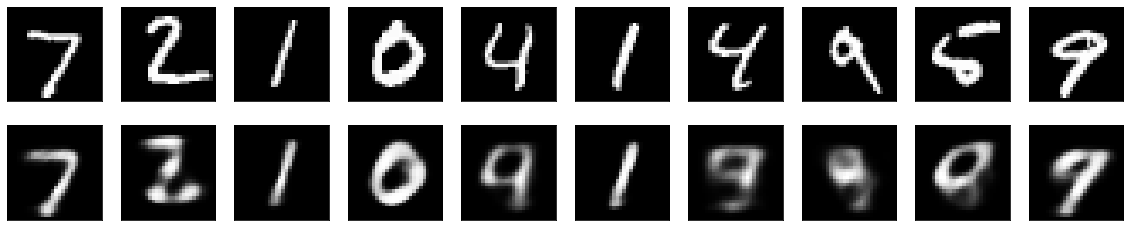

In [22]:

n = 10

imgs = x_test[:n]
encoded_imgs = s_encoder.predict(imgs, batch_size=n)
encoded_imgs[1]

decoded_imgs = s_decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)